Winning percentage based on passing_quote category:
winner                      Draw        No       Yes
passing_quote_category                              
High                    0.000000  0.153846  0.846154
Low                     0.279412  0.426471  0.294118
Medium                  0.245161  0.348387  0.406452

Winning percentage based on passing_rate_diff category:
winner                          Draw        No       Yes
passing_rate_diff_category                              
Negative                    0.246667  0.440000  0.313333
Positive                    0.246667  0.313333  0.440000
Zero                        0.500000  0.250000  0.250000


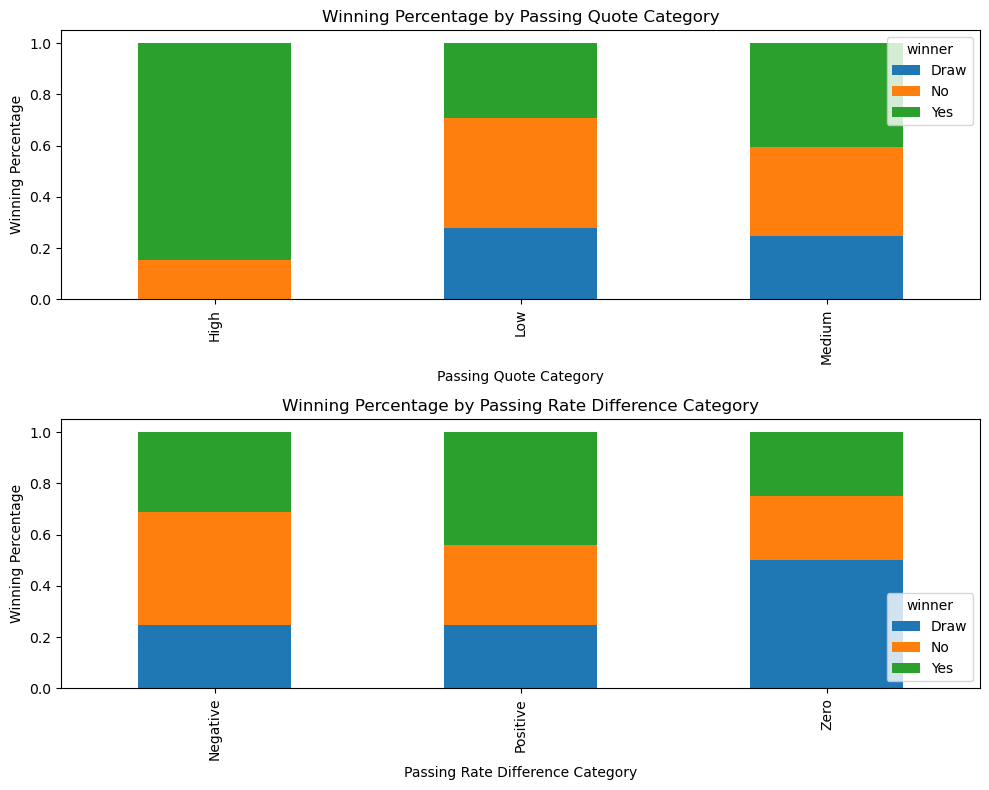

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("Desktop/passes (3).csv", delimiter=';')

# Drop rows with NaN values
df = df.dropna()

# Group by 'game_id' and transform 'winner' column
df['winner'] = df.groupby('game_id')['winner'].transform(lambda x: 'Draw' if all(x == 'No') else x)

# Calculate the difference in passing quote
df['passing_rate_diff'] = df.groupby('game_id')['passing_quote'].diff()

# Fill NaN values in 'passing_rate_diff' column with the negative of the first valid value within each group
df['passing_rate_diff'] = df.groupby('game_id')['passing_rate_diff'].transform(lambda x: x.fillna(-x.dropna().iloc[0]))

# Function to categorize passing_quote
def categorize_passing_quote(passing_quote):
    if passing_quote < 80:
        return 'Low'
    elif 80 <= passing_quote < 90:
        return 'Medium'
    else:
        return 'High'

# Function to categorize passing_rate_diff
def categorize_passing_rate_diff(passing_rate_diff):
    if passing_rate_diff < 0:
        return 'Negative'
    elif passing_rate_diff == 0:
        return 'Zero'
    else:
        return 'Positive'

# Apply passing_quote threshold categories
df['passing_quote_category'] = df['passing_quote'].apply(categorize_passing_quote)

# Apply passing_rate_diff threshold categories
df['passing_rate_diff_category'] = df['passing_rate_diff'].apply(categorize_passing_rate_diff)

# Analyze winning percentage for each passing_quote category
passing_quote_win_percentage = df.groupby('passing_quote_category')['winner'].value_counts(normalize=True).unstack().fillna(0)
print("Winning percentage based on passing_quote category:")
print(passing_quote_win_percentage)

# Analyze winning percentage for each passing_rate_diff category
passing_rate_diff_win_percentage = df.groupby('passing_rate_diff_category')['winner'].value_counts(normalize=True).unstack().fillna(0)
print("\nWinning percentage based on passing_rate_diff category:")
print(passing_rate_diff_win_percentage)

# Visualize the results
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot histograms for passing_quote categories
passing_quote_win_percentage.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Winning Percentage by Passing Quote Category')
axes[0].set_xlabel('Passing Quote Category')
axes[0].set_ylabel('Winning Percentage')

# Plot histograms for passing_rate_diff categories
passing_rate_diff_win_percentage.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Winning Percentage by Passing Rate Difference Category')
axes[1].set_xlabel('Passing Rate Difference Category')
axes[1].set_ylabel('Winning Percentage')

plt.tight_layout()
plt.show()

df2 = df[df['winner'] != 'Draw']


In [66]:
df2

,game_id,passing_quote,winner,passing_rate_diff,passing_quote_category,passing_rate_diff_category
0,11,72.0,No,-19.0,Low,Negative
1,11,91.0,Yes,19.0,High,Positive
2,12,82.0,Yes,-4.0,Medium,Negative
3,12,86.0,No,4.0,Medium,Positive
4,13,82.0,Yes,3.0,Medium,Positive
...,...,...,...,...,...,...
299,176,91.0,Yes,15.0,High,Positive
300,177,78.0,No,-3.0,Low,Negative
301,177,81.0,Yes,3.0,Medium,Positive
304,179,74.0,Yes,-15.0,Low,Negative


In [67]:
# import pandas as pd

# # Read the CSV file
# df = pd.read_csv("Desktop/passes (3).csv", delimiter=';')

# # Drop rows with NaN values
# df = df.dropna()

# # Group by 'game_id' and transform 'winner' column
# df['winner'] = df.groupby('game_id')['winner'].transform(lambda x: 'Draw' if all(x == 'No') else x)

# # Sort the DataFrame by 'game_id' and 'winner' columns
# df.sort_values(['game_id', 'winner'], inplace=True)

# # Calculate the difference in passing quote
# df['passing_rate_diff'] = df.groupby('game_id')['passing_quote'].diff()

# # Fill NaN values in 'passing_rate_diff' column with the negative of the first valid value within each group
# df['passing_rate_diff'] = df.groupby('game_id')['passing_rate_diff'].transform(lambda x: x.fillna(-x.dropna().iloc[0]))
# # df['passing_rate_diff'] = abs(df['passing_rate_diff'])
# # Display the DataFrame


# # df['Has higher rate'] = 0  # Initialize with 0

# # # Iterate over unique game IDs
# # for game_id in df['game_id'].unique():
# #     game_rows = df[df['game_id'] == game_id]  # Get rows for the current game ID
# #     max_passing_quote = game_rows['passing_quote'].max()  # Maximum passing rate in the game
# #     for index, row in game_rows.iterrows():
# #         if row['passing_quote'] == max_passing_quote:
# #             df.loc[index, 'Has higher rate'] = 1  # Set 'Has higher rate' to 1 if passing rate is the highest in the game
# #         else:
# #             df.loc[index, 'Has higher rate'] = 0  # Set 'Has higher rate' to 0 for the other team


# df2 = df[df['winner'] != 'Draw']
# y = df2['winner'].apply(lambda x: 0 if x == 'Yes' else 1 )  
# df2['passing_rate_gt_85'] = (df2['passing_quote'] >= 85).astype(int)
# df2['passing_diff_5_to_20'] = ((df2['passing_rate_diff'] >= 5) & (df2['passing_rate_diff'] <= 20)).astype(int)

# # df2['passing_rate_gt_89'] = ((df2['passing_quote'] > 89).astype(int)

# df2

In [68]:
# Filter the DataFrame to include only rows where the winner is 'No' (losers)
losers_df = df[df['winner'] == 'No']

# Calculate the average difference in passing rate of losers compared to winners
average_passing_rate_diff_losers = losers_df['passing_rate_diff'].mean()

print("Average difference in passing rate of losers compared to winners:", average_passing_rate_diff_losers)


Average difference in passing rate of losers compared to winners: -1.8157894736842106


In [69]:
# Filter the DataFrame to include only rows where the winner is 'No' (losers)
losers_df = df[df['winner'] == 'Yes']

# Calculate the average difference in passing rate of losers compared to winners
average_passing_rate_diff_losers = losers_df['passing_rate_diff'].mean()

print("Average difference in passing rate of wineers compared to losers:", average_passing_rate_diff_losers)


Average difference in passing rate of wineers compared to losers: 1.8157894736842106



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


winner,No,Yes
passing_quote_bucket,,
"[50, 55)",0,1
"[55, 60)",0,1
"[60, 65)",1,3
"[65, 70)",3,5
"[70, 75)",16,13
"[75, 80)",38,17
"[80, 85)",38,26
"[85, 90)",16,37
"[90, 95)",2,11


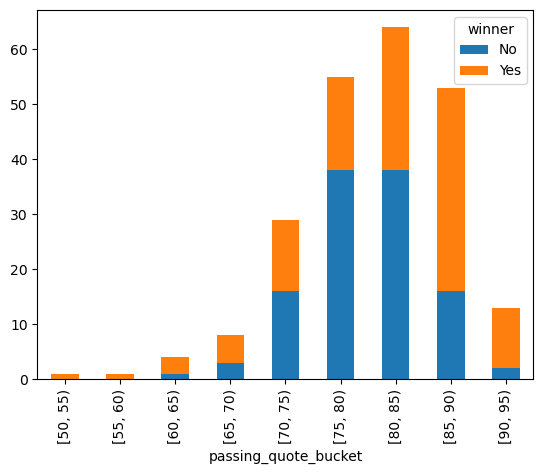

In [70]:
import matplotlib as plt

# Create buckets for passing quotes
passing_quote_buckets = pd.cut(df2['passing_quote'], bins=range(50, 100, 5), right=False)

# Add the buckets as a new column to the DataFrame
df2['passing_quote_bucket'] = passing_quote_buckets

grouped = df2.groupby(['passing_quote_bucket', 'winner']).size().unstack(fill_value=0)

# Plot the graph
grouped.plot(kind='bar', stacked=True)
# plt.la('Passing Quote Buckets')
# plt.ylabel('Count')
# plt.title('Passing Quotes vs. Count for Winners and Losers')
# plt.xticks(rotation=45)
# plt.legend(title='Winner')
# plt.show()

grouped


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot: xlabel='passing_rate_diff_bucket'>

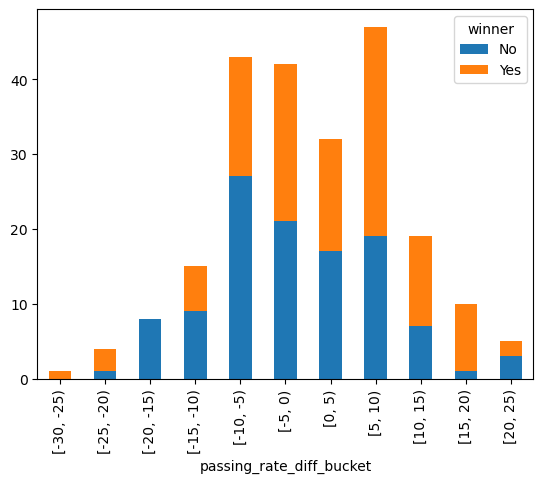

In [71]:
passing_rate_diff_buckets = pd.cut(df2['passing_rate_diff'], bins=range(-30, 30, 5), right=False)

# Add the buckets as a new column to the DataFrame
df2['passing_rate_diff_bucket'] = passing_rate_diff_buckets

df2

# Group by passing rate difference buckets and winner
grouped = df2.groupby(['passing_rate_diff_bucket', 'winner']).size().unstack(fill_value=0)

# Plot the graph
grouped.plot(kind='bar', stacked=True)
# plt.xlabel('Passing Rate Difference Buckets')
# plt.ylabel('Count')
# plt.title('Passing Rate Difference vs. Count for Winners and Losers')
# plt.xticks(rotation=45)
# plt.legend(title='Winner')
# plt.show()

In [72]:
import pandas as pd

# Assuming 'df2' is your DataFrame with the 'passing_rate_diff_bucket' column
# One-hot encode the 'passing_rate_diff_bucket' column
df2 = pd.get_dummies(df2, columns=['passing_quote_category','passing_rate_diff_category'])


new_column_names = [str(column).replace('[', '').replace(']', '').replace('<', '') for column in df2.columns]

# Rename the columns in df2
df2.columns = new_column_names


# Display the updated DataFrame 'df2' with one-hot encoded columns
df2


,game_id,passing_quote,winner,passing_rate_diff,passing_quote_bucket,passing_rate_diff_bucket,passing_quote_category_High,passing_quote_category_Low,passing_quote_category_Medium,passing_rate_diff_category_Negative,passing_rate_diff_category_Positive,passing_rate_diff_category_Zero
0,11,72.0,No,-19.0,"[70, 75)","[-20, -15)",0,1,0,1,0,0
1,11,91.0,Yes,19.0,"[90, 95)","[15, 20)",1,0,0,0,1,0
2,12,82.0,Yes,-4.0,"[80, 85)","[-5, 0)",0,0,1,1,0,0
3,12,86.0,No,4.0,"[85, 90)","[0, 5)",0,0,1,0,1,0
4,13,82.0,Yes,3.0,"[80, 85)","[0, 5)",0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,176,91.0,Yes,15.0,"[90, 95)","[15, 20)",1,0,0,0,1,0
300,177,78.0,No,-3.0,"[75, 80)","[-5, 0)",0,1,0,1,0,0
301,177,81.0,Yes,3.0,"[80, 85)","[0, 5)",0,0,1,0,1,0
304,179,74.0,Yes,-15.0,"[70, 75)","[-15, -10)",0,1,0,1,0,0


In [73]:
df2.columns

Index(['game_id', 'passing_quote', 'winner', 'passing_rate_diff',
       'passing_quote_bucket', 'passing_rate_diff_bucket',
       'passing_quote_category_High', 'passing_quote_category_Low',
       'passing_quote_category_Medium', 'passing_rate_diff_category_Negative',
       'passing_rate_diff_category_Positive',
       'passing_rate_diff_category_Zero'],
      dtype='object')

In [74]:
# loser_passing_quote = df2[df2['winner'] == 'No'].groupby('game_id')['passing_quote'].max()

# # Filter the DataFrame to include only rows where the loser's passing quote is greater than 85
# filtered_data = df[df['game_id'].isin(loser_passing_quote[loser_passing_quote > 85].index)]

# # Display the filtered data
# print(filtered_data)

In [75]:
# passing_rate_counts = df2.groupby(['game_id', 'winner'])['passing_rate_gt_85'].sum().unstack(fill_value=0)

# passing_rate_counts

In [76]:
# # Determine if winners have a higher passing rate than losers
# winners_higher_passing_rate = (passing_rate_counts['Yes'] > passing_rate_counts['No']).sum()

# # Determine if losers have a higher passing rate than winners
# losers_higher_passing_rate = (passing_rate_counts['Yes'] < passing_rate_counts['No']).sum()

# draw_higher_passing_rate = (passing_rate_counts['Yes'] == passing_rate_counts['No']).sum()


# print("In {} games, winners have a passing rate greater than 85%".format(winners_higher_passing_rate))
# print("In {} games, losers have a passing rate greater than 85%".format(losers_higher_passing_rate))
# print(" {}  both teams have a passing rate greater than 85%".format(draw_higher_passing_rate))

# games_with_high_passing_rate_losers = df2[df2['passing_rate_gt_85'] == 1]
# games_with_high_passing_rate_losers

In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns


# df2['passing_rate_70_to_75'] = ((df2['passing_quote'] > 70) & (df2['passing_quote'] < 75)).astype(int)
# df2['passing_rate_75_to_80'] = ((df2['passing_quote'] > 75) & (df2['passing_quote'] < 85)).astype(int)
# df2['passing_rate_gt_90'] = ((df2['passing_quote'] > 90) ).astype(int)
# df2['passing_rate_50_to_65'] = ((df2['passing_quote'] > 50) & (df2['passing_quote'] <= 65)).astype(int)
# df2['passing_rate_gt_65_ls_70'] = ((df2['passing_quote'] > 65) & (df2['passing_quote'] <= 70)).astype(int)
# df2['passing_rate_gt_95'] = (df2['passing_quote'] > 95).astype(int)

# Splitting the data
X = df2[['passing_quote','passing_rate_diff','passing_quote_category_High', 'passing_quote_category_Low',
       'passing_quote_category_Medium', 'passing_rate_diff_category_Negative',
       'passing_rate_diff_category_Positive',
       'passing_rate_diff_category_Zero']]

# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# y
X

,passing_quote,passing_rate_diff,passing_quote_category_High,passing_quote_category_Low,passing_quote_category_Medium,passing_rate_diff_category_Negative,passing_rate_diff_category_Positive,passing_rate_diff_category_Zero
0,72.0,-19.0,0,1,0,1,0,0
1,91.0,19.0,1,0,0,0,1,0
2,82.0,-4.0,0,0,1,1,0,0
3,86.0,4.0,0,0,1,0,1,0
4,82.0,3.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
299,91.0,15.0,1,0,0,0,1,0
300,78.0,-3.0,0,1,0,1,0,0
301,81.0,3.0,0,0,1,0,1,0
304,74.0,-15.0,0,1,0,1,0,0


In [78]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize a logistic regression classifier
# clf = LogisticRegression()

# # Initialize Sequential Feature Selector
# sfs = SFS(clf,
#           k_features=3,  # Number of features to select
#           forward=True,  # Forward selection
#           floating=False,  # Disable floating feature selection
#           scoring='accuracy',  # Evaluation metric
#           cv=5)  # Cross-validation folds

# # Fit the Sequential Feature Selector to the training data
# sfs = sfs.fit(X_train, y_train)

# # Print selected features
# print('Selected features:', sfs.k_feature_idx_)

# # Evaluate performance on the test set
# print('Test accuracy:', sfs.k_score_)


In [79]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6, 7],
#     'min_child_weight': [1, 3, 5, 7, 9],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
#     'n_estimators': [200, 300, 400, 500, 600]
# }

# # Create the XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Perform grid search
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [80]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf

# # Assuming X and y are your features and target variable, respectively
# # Define your features (X) and target variable (y)
# X = df.drop(columns=['target_column'])  # Define your features
# y = df['target_column']  # Define your target variable

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Build the neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model
# y_pred_proba = model.predict(X_test_scaled)
# y_pred = (y_pred_proba > 0.5).astype(int)

# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Displaying results
# print(f'Accuracy: {accuracy}')
# print(f'Confusion Matrix:\n{conf_matrix}')
# print(f'Classification Report:\n{classification_rep}')

# # Plotting training history
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()


Accuracy: 0.5507246376811594
Confusion Matrix:
[[14 23]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        37
           1       0.51      0.75      0.61        32

    accuracy                           0.55        69
   macro avg       0.57      0.56      0.54        69
weighted avg       0.58      0.55      0.54        69



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


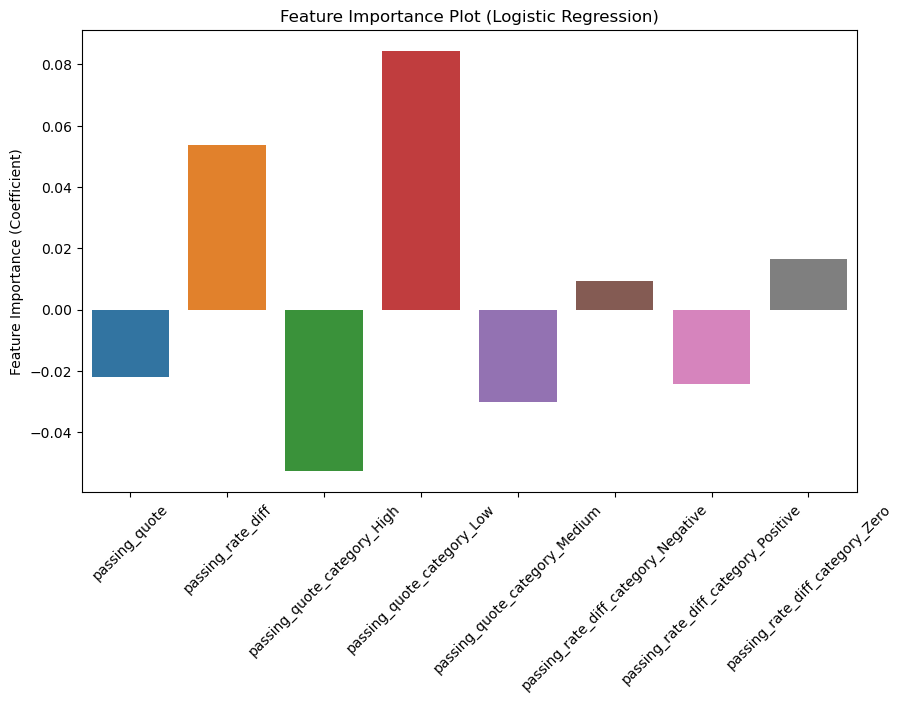

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12 )

# Logistic Regression model
logistic_model = LogisticRegression()

# Training the logistic regression model
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=X.columns, y=logistic_model.coef_[0], ax=ax)  # Using coefficients as feature importance
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
ax.set_ylabel('Feature Importance (Coefficient)')
ax.set_title('Feature Importance Plot (Logistic Regression)')
plt.show()



In [82]:
X_test

,passing_quote,passing_rate_diff,passing_quote_category_High,passing_quote_category_Low,passing_quote_category_Medium,passing_rate_diff_category_Negative,passing_rate_diff_category_Positive,passing_rate_diff_category_Zero
244,64.0,-9.0,0,1,0,1,0,0
111,70.0,-17.0,0,1,0,1,0,0
35,82.0,-6.0,0,0,1,1,0,0
200,87.0,2.0,0,0,1,0,1,0
155,66.0,-23.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
186,86.0,7.0,0,0,1,0,1,0
21,73.0,-4.0,0,1,0,1,0,0
101,80.0,3.0,0,0,1,0,1,0
77,77.0,-10.0,0,1,0,1,0,0


In [83]:
    X_test

,passing_quote,passing_rate_diff,passing_quote_category_High,passing_quote_category_Low,passing_quote_category_Medium,passing_rate_diff_category_Negative,passing_rate_diff_category_Positive,passing_rate_diff_category_Zero
244,64.0,-9.0,0,1,0,1,0,0
111,70.0,-17.0,0,1,0,1,0,0
35,82.0,-6.0,0,0,1,1,0,0
200,87.0,2.0,0,0,1,0,1,0
155,66.0,-23.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
186,86.0,7.0,0,0,1,0,1,0
21,73.0,-4.0,0,1,0,1,0,0
101,80.0,3.0,0,0,1,0,1,0
77,77.0,-10.0,0,1,0,1,0,0


Accuracy: 0.4927536231884058
Confusion Matrix:
[[23 10]
 [25 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.70      0.57        33
           1       0.52      0.31      0.39        36

    accuracy                           0.49        69
   macro avg       0.50      0.50      0.48        69
weighted avg       0.50      0.49      0.47        69



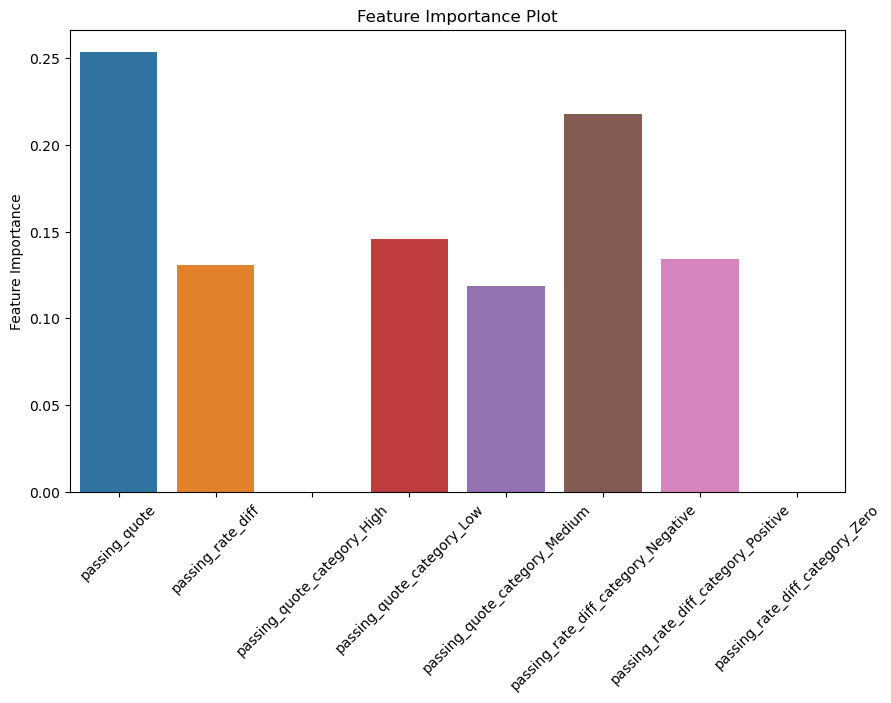

In [89]:
# {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 
#  'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.7}

# {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 9, 
#  'n_estimators': 500, 'subsample': 0.6}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# XGBoost model
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    objective='binary:logistic',
    max_depth = 3,
    n_estimators=200,
    min_child_weight=9,
    subsample=0.9,
    colsample_bytree=0.6
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plotting feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=X.columns, y=xgb_model.feature_importances_, ax=ax)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importance Plot')
plt.show()



<Figure size 2000x1000 with 0 Axes>

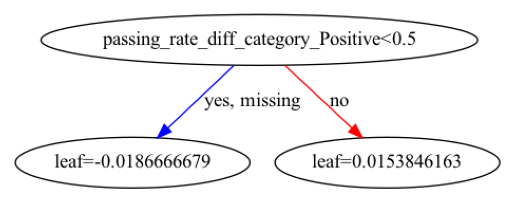

In [85]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model
# Plotting decision tree diagram with binary class labels in leaf values
plt.figure(figsize=(20, 10))
plot_tree(xgb_model, num_trees=0, rankdir='TB')
plt.show()


In [86]:
import shap


explainer = shap.Explainer(logistic_model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for a specific instance (e.g., the first instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:])